In [36]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import PolynomialFeatures
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
data = pd.read_csv(r'E:\programming\dataset\Into_to_statstical_learning\Advertising.csv')
print(data.shape)
data.head()

(200, 5)


,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [7]:
data = data.iloc[:,1:]
data.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [52]:
def fit_degree(data,var,target,degree):
    poly = PolynomialFeatures(degree)
    poly_data = poly.fit_transform(data[var].to_frame())
    lin_model = LinearRegression(fit_intercept=False)
    lin_model.fit(poly_data,data[target])
    pred = lin_model.predict(poly_data)
    
    return pred
    

# 1.Is there a relationship between advertising sales and budget?

### For tv

In [16]:
poly = PolynomialFeatures(1)
tv_data = poly.fit_transform(data['TV'].to_frame())
print('shape - ',tv_data.shape)
est = sm.OLS(data['sales'],tv_data)
est2 = est.fit()
print(est2.summary())

shape -  (200, 2)
                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Thu, 18 Jun 2020   Prob (F-statistic):           1.47e-42
Time:                        09:28:34   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.0326      0.458  

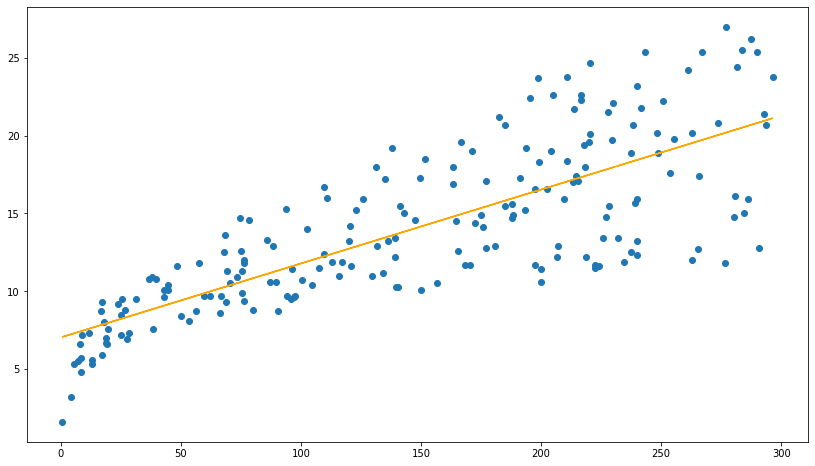

In [55]:
pred_1 = fit_degree(data,'TV','sales',1)
plt.figure(figsize = (14,8))
plt.scatter(data['TV'],data['sales'])
plt.plot(data['TV'],pred_1,color = 'orange')
plt.show()

### For radio

In [17]:
poly = PolynomialFeatures(1)
radio_data = poly.fit_transform(data['radio'].to_frame())
print('shape - ',radio_data.shape)
est = sm.OLS(data['sales'],radio_data)
est2 = est.fit()
print(est2.summary())

shape -  (200, 2)
                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.332
Model:                            OLS   Adj. R-squared:                  0.329
Method:                 Least Squares   F-statistic:                     98.42
Date:                Thu, 18 Jun 2020   Prob (F-statistic):           4.35e-19
Time:                        09:30:10   Log-Likelihood:                -573.34
No. Observations:                 200   AIC:                             1151.
Df Residuals:                     198   BIC:                             1157.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.3116      0.563  

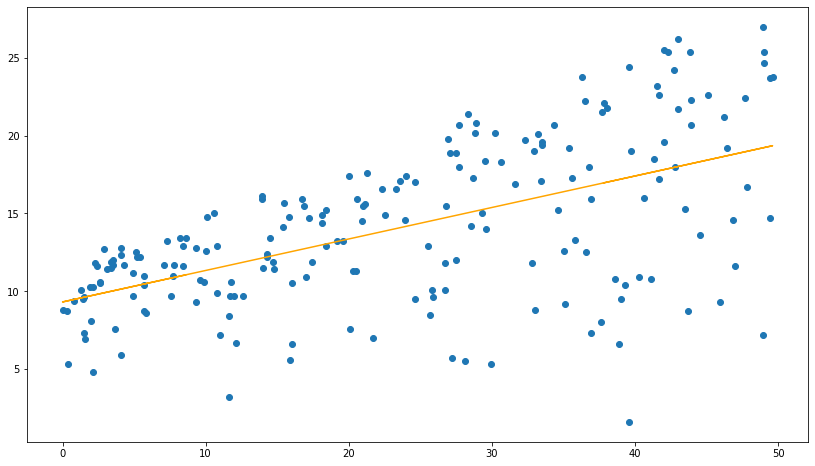

In [67]:
pred_1 = fit_degree(data,'radio','sales',1)
plt.figure(figsize = (14,8))
plt.scatter(data['radio'],data['sales'])
plt.plot(data['radio'],pred_1,color = 'orange')
plt.show()

### for newspaper

In [18]:
poly = PolynomialFeatures(1)
news_data = poly.fit_transform(data['newspaper'].to_frame())
print('shape - ',news_data.shape)
est = sm.OLS(data['sales'],news_data)
est2 = est.fit()
print(est2.summary())

shape -  (200, 2)
                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.052
Model:                            OLS   Adj. R-squared:                  0.047
Method:                 Least Squares   F-statistic:                     10.89
Date:                Thu, 18 Jun 2020   Prob (F-statistic):            0.00115
Time:                        09:31:06   Log-Likelihood:                -608.34
No. Observations:                 200   AIC:                             1221.
Df Residuals:                     198   BIC:                             1227.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.3514      0.621  

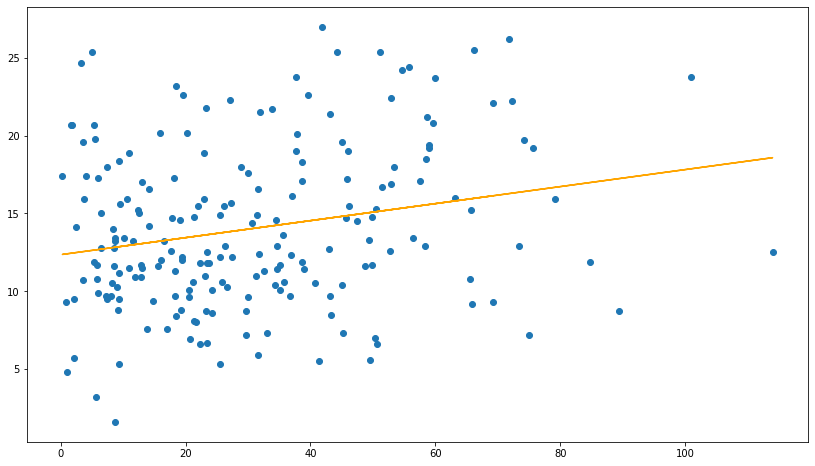

In [58]:
pred_1 = fit_degree(data,'newspaper','sales',1)
plt.figure(figsize = (14,8))
plt.scatter(data['newspaper'],data['sales'])
plt.plot(data['newspaper'],pred_1,color = 'orange')
plt.show()

# How strong is the relationship?

In [32]:
features = data.iloc[:,:3]
columns = ['constant'] + list(features.columns)
constant = pd.Series([1]*data.shape[0])
features = pd.concat([constant,features],axis = 1)
features.columns = columns

print('shape - ',features.shape)
est = sm.OLS(data['sales'],features)
est2 = est.fit()
print(est2.summary())

shape -  (200, 4)
                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Thu, 18 Jun 2020   Prob (F-statistic):           1.58e-96
Time:                        09:39:07   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
constant       2.9389      0.312  

# which media corresponds to sale?

In [35]:
# we can see the p value for the newspaper is very high, but for tv and radio the p value is significant

In [62]:
corr_matrix = data.corr()
corr_matrix
#radio and newpaper are highly correlated

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


In [34]:
#removing newspaper as a feature
features = data.iloc[:,:2]
columns = ['constant'] + list(features.columns)
constant = pd.Series([1]*data.shape[0])
features = pd.concat([constant,features],axis = 1)
features.columns = columns

print('shape - ',features.shape)
est = sm.OLS(data['sales'],features)
est2 = est.fit()
print(est2.summary())

shape -  (200, 3)
                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     859.6
Date:                Thu, 18 Jun 2020   Prob (F-statistic):           4.83e-98
Time:                        09:40:01   Log-Likelihood:                -386.20
No. Observations:                 200   AIC:                             778.4
Df Residuals:                     197   BIC:                             788.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
constant       2.9211      0.294  

# Is the relationship linear?

In [37]:
lin_model = LinearRegression(fit_intercept=False)
lin_model.fit(features,data['sales'])

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None, normalize=False)

In [38]:
lin_model.coef_

array([2.92109991, 0.04575482, 0.18799423])

In [39]:
pred = lin_model.predict(features)
residual = data['sales'] - pred 

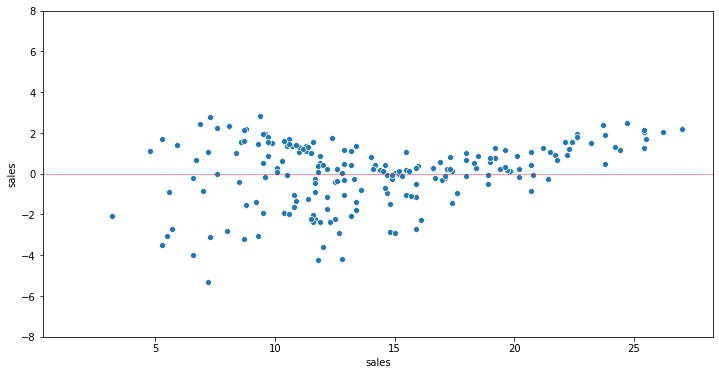

In [48]:
plt.figure(figsize = (12,6))
plt.ylim(-8, 8)
sns.scatterplot(x = data['sales'],y = residual)
plt.axhline(y = 0,linestyle = 'dashed',linewidth = 0.5,color = 'red')

In [68]:
# we can see from the graph, that the dispersion is not very well spread, there is some kind of 
# pattern on the right hand side of the graph

# Is there synergy among the interaction media?

In [69]:
data.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [71]:
data['interaction'] = data['TV']*data['radio']
data.head()

,TV,radio,newspaper,sales,interaction
0,230.1,37.8,69.2,22.1,8697.78
1,44.5,39.3,45.1,10.4,1748.85
2,17.2,45.9,69.3,9.3,789.48
3,151.5,41.3,58.5,18.5,6256.95
4,180.8,10.8,58.4,12.9,1952.64


In [72]:
features = data.drop(['newspaper','sales'],axis = 1)
columns = ['constant'] + list(features.columns)
constant = pd.Series([1]*data.shape[0])
features = pd.concat([constant,features],axis = 1)
features.columns = columns


print('shape - ',features.shape)
est = sm.OLS(data['sales'],features)
est2 = est.fit()
print(est2.summary())

shape -  (200, 4)
                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.968
Model:                            OLS   Adj. R-squared:                  0.967
Method:                 Least Squares   F-statistic:                     1963.
Date:                Thu, 18 Jun 2020   Prob (F-statistic):          6.68e-146
Time:                        11:47:09   Log-Likelihood:                -270.14
No. Observations:                 200   AIC:                             548.3
Df Residuals:                     196   BIC:                             561.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
constant        6.7502      0.24

## We can see that by just adding the interaction term we have got the R2 value of almost 97